# Figure development notebook

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import seaborn as sns

### Import data

In [41]:
df_SPE = pd.read_csv(".\DATA\solid-polymer-electrolytes.csv", engine='python')
df_GPE = pd.read_csv(".\DATA\gel-polymer-electrolytes.csv", engine='python')

### Clean and prepare data

In [42]:

df_SPE.sort_values(by=['class'], inplace=True)
df_GPE.sort_values(by=['class'], inplace=True)


## Figure XX - Solid polymer electrolyte class vs. conductivity box plot

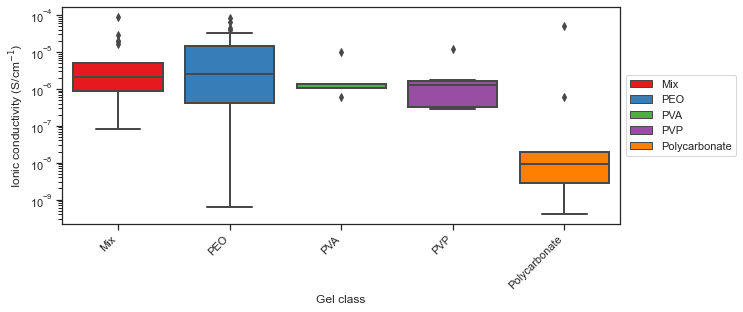

In [43]:
sns.set()
sns.set_style("white")
sns.set_style('ticks')
sns.set_context("notebook", rc={'axes.grid': True})
sns.set_palette('Set1')
plt.figure(figsize=(10, 4))

# All classes that do not have more than two independent references are excluded
df_SPE_box = df_SPE[
    (df_SPE['class'] != 'Other') & 
    (df_SPE['class'] != 'PAN') & 
    (df_SPE['class'] != 'Polyester') &
    (df_SPE['class'] != 'Poly(IL)') &
    (df_SPE['class'] != 'Nonwoven composite') &
    (df_SPE['class'] != 'Polymerized sodium salt') 
    ]

SPE_box = sns.boxplot(
                x='class', 
                y='conductivity_(20-30)degC', 
                hue='class', 
                data=df_SPE_box,
                dodge=False,
                linewidth=2,
                saturation=1.5,
                ).set(
    xlabel='Gel class',
    ylabel='Ionic conductivity (S/cm$^{-1}$)',
    yscale='log',
    )

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    )

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.savefig('.\FIGURES\SPE_class-vs-cond_box.svg', 
           transparent=False)

## Figure xx - Gel polymer electrolyte class vs. conductivity box plot

### Caption
fsdfsdfsdfsd

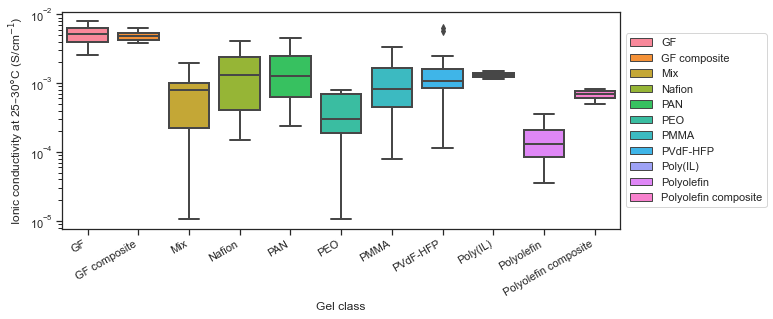

In [44]:
sns.set()
sns.set_style("white")
sns.set_style('ticks')
sns.set_context("notebook", rc={'axes.grid': True})
sns.set_palette('Set1')
plt.figure(figsize=(10, 4))

# All classes that do not have more than two independent references are excluded
df_GPE_box = df_GPE[
    (df_GPE['class'] != 'Other') & 
    (df_GPE['class'] != 'PVP') & 
    (df_GPE['class'] != 'Ceramic-composite')
    ]

GPE_box = sns.boxplot(
                x='class', 
                y='conductivity_(20-30)degC', 
                hue='class', 
                data=df_GPE_box,
                dodge=False,
                linewidth=2,
                saturation=1.5,
                ).set(
    xlabel='Gel class',
    ylabel='Ionic conductivity at 25$\endash$30$\degree$C (S/cm$^{-1}$)',
    yscale='log',
    )
plt.xticks(
    rotation=30,
    horizontalalignment='right',
    )

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.savefig('.\FIGURES\GPE_class-vs-cond_box.svg', 
           transparent=False)

## Figure XX - Gel conductivity vs. porosity
### Caption
dfsfddfs

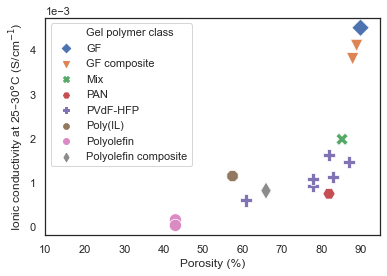

In [45]:
df_cond_por = df_GPE.loc[:, ('UID', 'class', 'porosity', 'conductivity_(20-30)degC')]
df_cond_por.dropna(inplace=True)
df_cond_por.sort_values(by=['class'], inplace=True)

sns.set()
sns.set_style("white")
sns.set_context("notebook",rc={'axes.grid': True})
plt.figure(figsize=(6, 4))
markers = ['D', 'v', 'X', 'H', 'P', '8', 'o', 'd']

fig_cond = sns.scatterplot(
                x='porosity', 
                y='conductivity_(20-30)degC', 
                hue='class', 
                data=df_cond_por, 
                s=150, 
                style='class', 
                markers=markers
                )

plt.xlim(10, 95)
plt.xlabel('Porosity (%)')
plt.ylabel('Ionic conductivity at 25$\endash$30$\degree$C (S/cm$^{-1}$)')
plt.legend().texts[0].set_text("Gel polymer class")
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))

plt.savefig('.\FIGURES\GPE_porosity-vs-conductivity.svg', 
           transparent=False)

## Figure XX - GPE tensile strength vs conductivity

### Caption
fdfdfd

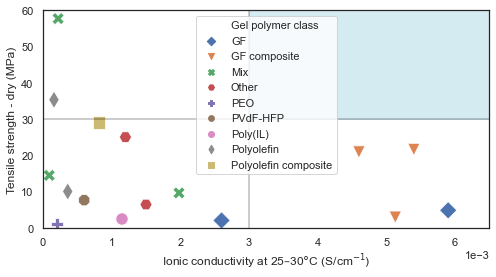

In [46]:
df_cond_strength = df_GPE.loc[:, ('UID', 'class', 'strength_tensile_dry', 'conductivity_(20-30)degC')]
df_cond_strength.dropna(inplace=True)
df_cond_strength.sort_values(by=['class'], inplace=True)

sns.set()
sns.set_style("white")
sns.set_context("notebook",rc={'axes.grid': True})
plt.figure(figsize=(8, 4))
markers = ['D', 'v', 'X', 'H', 'P', '8', 'o', 'd', 's']

fig_cond = sns.scatterplot(
                x='conductivity_(20-30)degC', 
                y='strength_tensile_dry', 
                hue='class', 
                data=df_cond_strength, 
                s=150, 
                style='class', 
                markers=markers
                )

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel('Ionic conductivity at 25$\endash$30$\degree$C (S/cm$^{-1}$)')
plt.ylabel('Tensile strength - dry (MPa)')
plt.legend().texts[0].set_text("Gel polymer class")
plt.xlim(0, 0.0065)
plt.ylim(0, 60)
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))

plt.plot([0.003, 0.003], [-10, 80], linewidth=2, color='black', alpha=0.2)
plt.plot([-1, 1], [30, 30], linewidth=2, color='black', alpha=0.2)
fig_cond.add_patch(patches.Rectangle((0.003, 30), 1, 60, color='lightblue', alpha=0.5))

plt.savefig('.\FIGURES\GPE_strength-vs-conductivity.svg', 
           transparent=False)

## Figure XX - conductivity vs. glass transition temperature
### Caption


At low temps there's a negative correlation between conductivity and glass transition temperature (low Tg = high conductivity)

At high temps fuck all correlation

two subplots as per existing figure, only use PEO PC and PE. Log y axis.

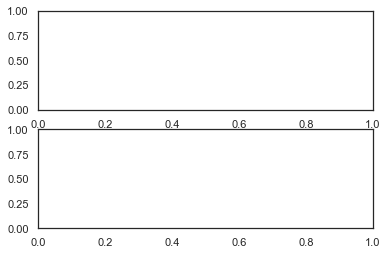

In [49]:
df_SPE_Tg = df_SPE


plt.subplot(2, 1, 1)


plt.subplot(2, 1, 2)


## Figure XX - high temp conductivity vs. sodium concentration

### Caption




In [48]:
sns.set()
sns.set_style("white")
sns.set_context("notebook",rc={'axes.grid': True})
plt.figure(figsize=(6, 4))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>